In [10]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image


%matplotlib inline

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

   
    
    




   
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation='relu'), # 512 neuron hidden layer
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])


/Users/ramyaamudapakula/miniconda3/envs/webapp2/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 147, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1028)           │       527,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815,401 (3.11 MB)

 Trainable params: 815,401 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# from keras.layers.core import Dense, Dropout, Flatten, Activation
# from keras.layers import Conv2D, MaxPooling2D
# model = tf.keras.models.Sequential([
  
#     # Note the input shape is the desired size of the image 300x300 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
  
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
  
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
  
#     # The fourth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
  
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),




   
  
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1028, activation='relu'), # 512 neuron hidden layer
    
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # to get the summary of the model
# model.summary()

# # configure the model for traning by adding metrics
# model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])


In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.02,
        zoom_range=0.02,
        horizontal_flip=True,
        vertical_flip= True,
        rotation_range=0.01,
        )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/Users/ramyaamudapakula/Downloads/Dental_AI-main/data/training',
        target_size=(300, 300),
        batch_size=70,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '/Users/ramyaamudapakula/Downloads/Dental_AI-main/data/validation',
        target_size=(300, 300),
        batch_size=30,
        class_mode='binary')
history = model.fit(
         train_generator,
         epochs=100,
         validation_data=validation_generator,
      )

Found 71 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/100


/Users/ramyaamudapakula/miniconda3/envs/webapp2/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4953 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.7155
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.3192 - loss: 0.7602 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.6620 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6620 - loss: 0.6987 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4953 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3286 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6714 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5047 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.7286
Epoch 9/100
2/2 ━━━

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/Users/ramyaamudapakula/Downloads/Dental_AI-main/data/test',
    target_size=(300, 300),
    batch_size=10,
    class_mode='binary'
)

print("Test Generator Directory:", test_generator.directory)
print("Number of Test Samples:", test_generator.samples)

# Evaluate the model
eval_result = model.evaluate(test_generator)
print('Loss rate at evaluation data:', eval_result[0])
print('Accuracy rate at evaluation data:', eval_result[1])



Found 10 images belonging to 2 classes.
Test Generator Directory: /Users/ramyaamudapakula/Downloads/Dental_AI-main/data/test
Number of Test Samples: 10


/Users/ramyaamudapakula/miniconda3/envs/webapp2/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.5000 - loss: 0.6937
Loss rate at evaluation data: 0.6937325596809387
Accuracy rate at evaluation data: 0.5


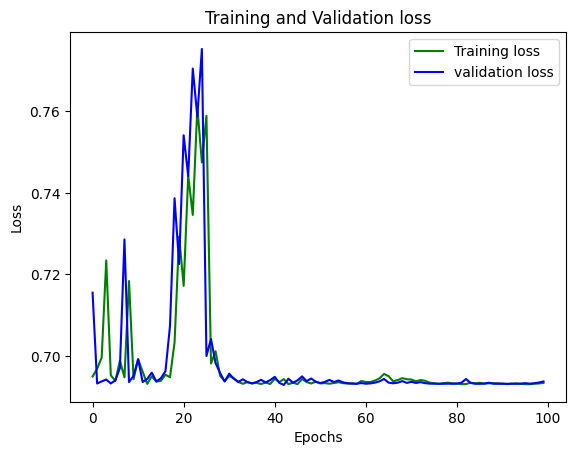

In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

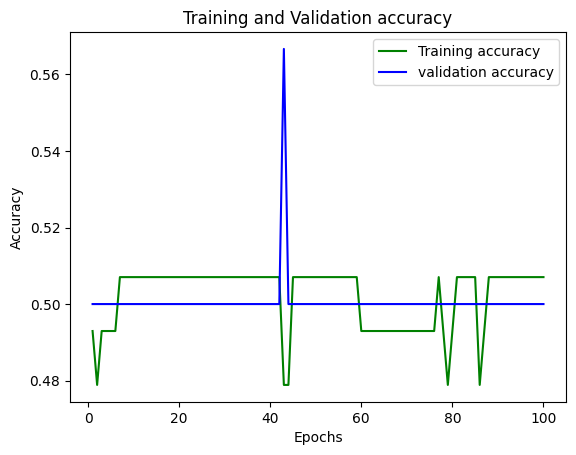

In [25]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epoch = range(1,101)
plt.plot(epoch,loss_train, 'g', label='Training accuracy')
plt.plot(epoch,loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.56206346]
periodontal problem


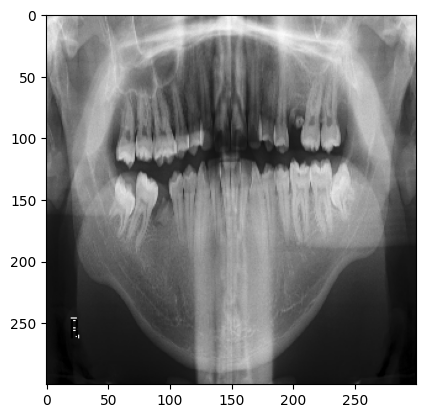

In [29]:
import os
from IPython.display import Image

path = '/Users/ramyaamudapakula/Downloads/Dental_AI-main/data/test/non-periodontal/non_periodontal_35.png' 
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]>= 0.5:
    print('periodontal problem')
    plt.imshow(img)
else:
    print('normal')
    plt.imshow(img)